In [2]:
pip install yfinance pandas statsmodels arch matplotlib

   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/924.9 kB 660.6 kB/s eta 0:00:02
   -------------- ------------------------- 327.7/924.9 kB 3.4 MB/s eta 0:00:01
   ------------------------------- -------- 716.8/924.9 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 924.9/924.9 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt

In [9]:
# Download financial data for Wipro (WIPRO.NS)
ticker = 'WIPRO.NS'
data = yf.download(ticker, start='2010-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,154.125000,156.825012,152.088760,156.105011,136.399612,3409626
2010-01-05,156.667511,159.300003,156.048752,158.568756,138.552338,4979701
2010-01-06,158.850006,159.750000,154.575012,155.362503,135.750809,4575030
2010-01-07,156.375000,156.487503,151.875000,152.606262,133.342484,4582648
2010-01-08,152.775009,153.000000,149.850006,150.311264,131.337189,2856839


In [10]:
# Save the data to an Excel file
output_file = 'Wipro_Financial_Data.xlsx'
data.to_excel(output_file, engine='openpyxl')

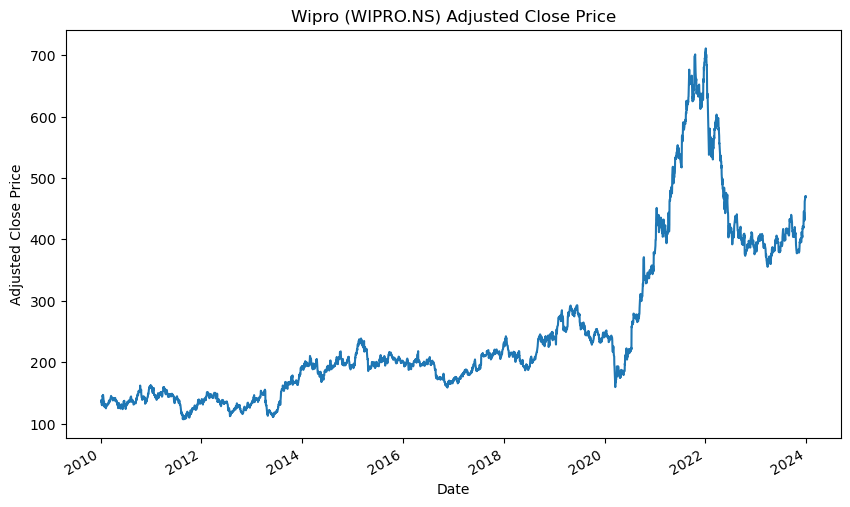

In [9]:
# Plot the adjusted close price
plt.figure(figsize=(10, 6))
data['Adj Close'].plot(title='Wipro (WIPRO.NS) Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [8]:

# Calculate returns
data['Return'] = data['Adj Close'].pct_change().dropna()

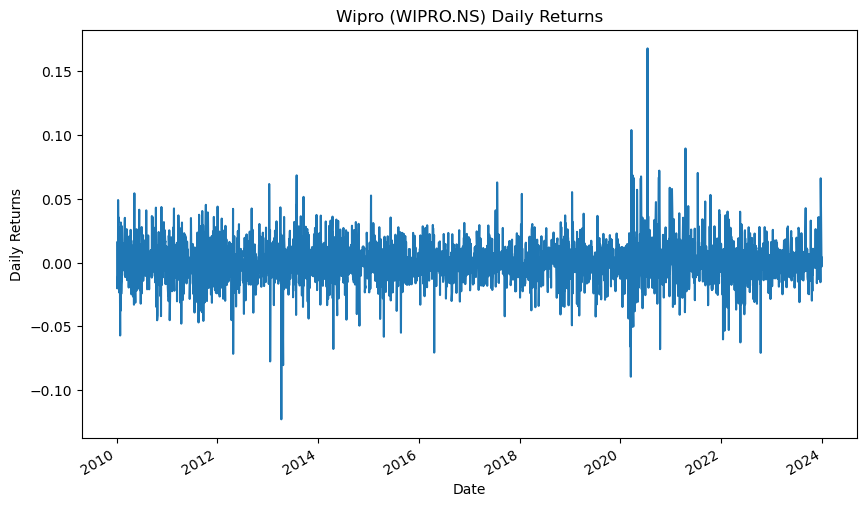

In [10]:
# Plot the returns
plt.figure(figsize=(10, 6))
data['Return'].plot(title='Wipro (WIPRO.NS) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

In [11]:
# Drop NaN values from returns
returns = data['Return'].dropna()

# Check for ARCH effects using the ARCH-LM test
arch_test = sm.stats.diagnostic.het_arch(returns)
print(f'ARCH Test: {arch_test}')

ARCH Test: (80.381729126748, 4.225768109411341e-13, 8.204026509716124, 2.960595968658249e-13)


In [15]:
# Fit a GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
res = model.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3467605546294.2827
Iteration:      2,   Func. Count:     18,   Neg. LLF: 7310173718412368.0
Iteration:      3,   Func. Count:     30,   Neg. LLF: 599081559819.5735
Iteration:      4,   Func. Count:     42,   Neg. LLF: 5452.531291706069
Iteration:      5,   Func. Count:     51,   Neg. LLF: 8846.33828822436
Iteration:      6,   Func. Count:     61,   Neg. LLF: -8765.936167071904
Iteration:      7,   Func. Count:     68,   Neg. LLF: -6488.224294756949
Iteration:      8,   Func. Count:     76,   Neg. LLF: -9286.311071673146
Iteration:      9,   Func. Count:     84,   Neg. LLF: -9230.470922457027
Iteration:     10,   Func. Count:     91,   Neg. LLF: -9419.370775551273
Optimization terminated successfully    (Exit mode 0)
            Current function value: -9419.371758395264
            Iterations: 12
            Function evaluations: 101
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results       

C:\Users\manor\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002688. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


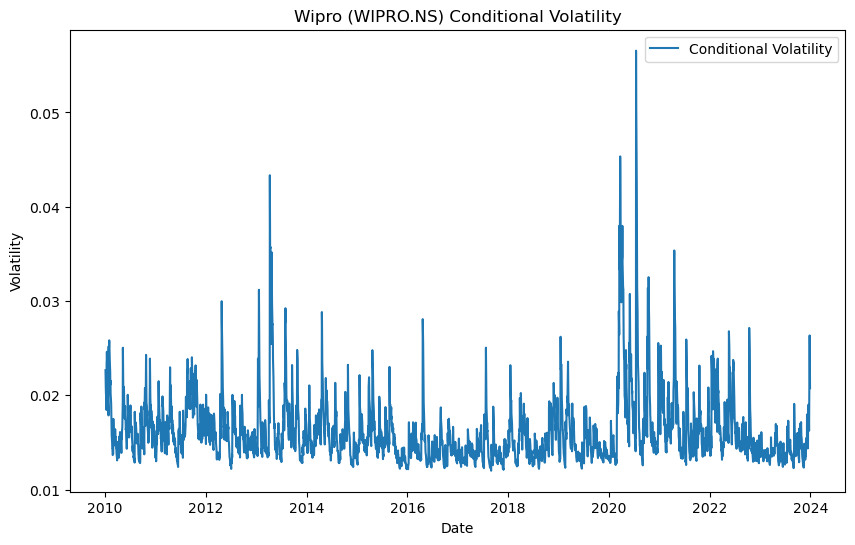

In [16]:
# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(res.conditional_volatility, label='Conditional Volatility')
plt.title('Wipro (WIPRO.NS) Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [17]:
# Forecast volatility for the next three months (90 days)
forecast = res.forecast(horizon=90)
volatility = forecast.variance[-1:] ** 0.5
print(volatility)

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2023-12-29  0.019244  0.018997  0.018773  0.018569  0.018384  0.018216   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2023-12-29  0.018064  0.017927  0.017802  0.017689  ...  0.016664  0.016664   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2023-12-29  0.016664  0.016664  0.016664  0.016664  0.016664  0.016664   

                h.89      h.90  
Date                            
2023-12-29  0.016664  0.016664  

[1 rows x 90 columns]


In [19]:
# Extract the forecasted volatility values
forecasted_volatility = volatility.values.flatten()

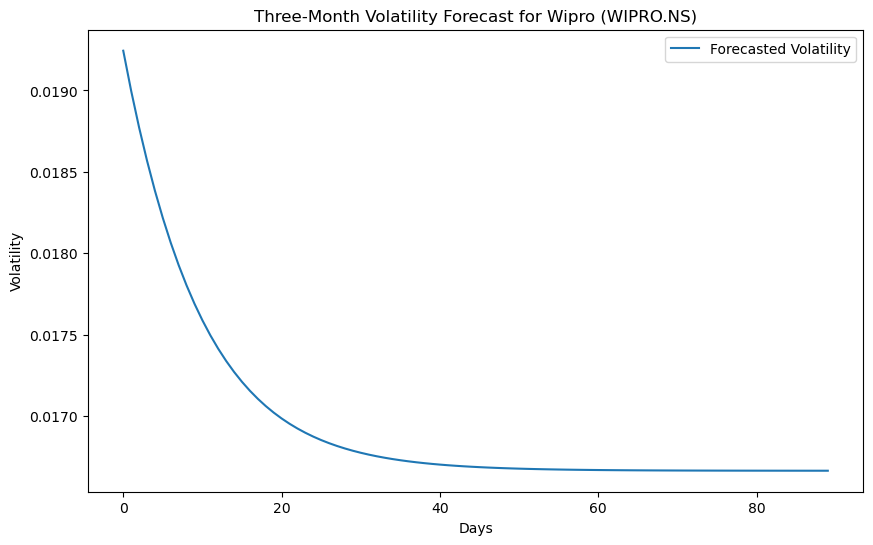

In [20]:
# Plot volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(volatility.values.T.flatten(), label='Forecasted Volatility')
plt.title('Three-Month Volatility Forecast for Wipro (WIPRO.NS)')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.legend()
plt.show()